# Basic statistical tests

*Gries, esp. chapter 4, pp. 136-246*

In this sprint, we cover a whole array of conventional, often well-known tests from statistics. People will expect you to know these, as well as when to apply them, but you don't necessarily have to store all that information in your head. Most "Stats 101" courses, in fact, will introduce these tests using a flow chart like the one below (which is the one offered by Gries). By correctly answering the questions represented by the arrows it should in principle be easy to pick the test that you need -- even though this graph might seem overwhelming at first, as well as the fact that the questions that you have have to answer aren't always that easy.

The good news is that, once you've identified the optimal test for your case, the application of the test tends to be pretty straightforward and standardized: you apply it (often in a single line of code), collect the relevant test statistic(s), and record the $p$-value(s). In fact, interpreting the output is often more difficult than running the actual analysis.

## The flowchart

<img src="sflwr3_navigator.png" />

To navigate this flowchart, you'll have to be able to answer a couple clear questions about:
- **measurements**: your data (i.e. the variables you want to use)
- **intent**: your hypotheses (i.e. the questions that you want to see answered)

The most important criteria to decide which test is appropriate for you, relate to the following issues:

1. Which kind of variables do you have?
    - categorical (AKA nominal), with levels
    - ratio-scaled (doubles)
    - counts (integers)
    - ordinal
    
We haven't explicitly dealt with **ordinal variables** yet.
- Ordinal variables can look like a categorical variable, because they also have levels. A crucial difference, however, is that the levels of an ordinal variable can be **ranked** or **ordered**. Information about different social classes (cf. socialdata) are a good example: on the surface, such levels look like categories, but these categories can be ordered from "lower" to "higher" social classes.
- Ordinal variables can often look like a plain integer-encoded numeric variable, but that can be treacherous: take the famous [Likert scale](https://en.wikipedia.org/wiki/Likert_scale) that is often used in questionaires, asking for instance, how "happy" people are. Such **scales** might give the participant 7 options to express their current level of happiness; e.g.:

>    1. very happy
>    2. moderately happy
>    3. slightly happy
>    4. neutral
>    5. slightly unhappy
>    6. moderately unhappy
>    7. unhappy
    
A crucial aspect of such scales is that it is **treacherous** to encode them with **integers**, because those suggest that the *difference between each two consecutive levels in the scale is always the same*. For a happiness judgment, however, that is probably not the case: the "amount of happyiness" that takes a respondent from 4 to 3, is probably not the same as the amount of happiness that is required to move a participant response from 2 to 1.

Because of these two properties, ordinal variables often require a different kind of statistical test.
    
2. How many variables do you have?
    - univariate (just one)
    - bivariate (exactly two)
    - (multivariate: more than two)
    - bivariate: are your variables **paired** or **unpaired**? (See below)

3. Which distributions (and variance) do your variables have?
    - often, variables need to have a normal distribution (in fact, we'll also cover how you can test for **normality**)
    - often, if you want to compare two variables, tests will require that they have a similar degree of variance
    
4. What's the size of your data?
   - Many tests have a critical lower boundary for $n$
   
5. What's your question?
   - means? distributions? variances?
   - directional or undirectional?


**Important:** for all of these tests, the same scenario applies:
 1. pick (at least) one suitable test, e.g. using the flowchart
 2. check the test's requirements (i.e. whether you're allowed to apply it)
 3. apply it: get the statistic, $p$-value, and preferably some other things as well (e.g. confidence interval)
 4. report it in proper prose, explicitly adding all relevant numbers

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm
import math

## Testing for normality

*Gries, chapter 4, pp. 162-165*

Some of the most common tests that you'll need target the "normality" of the values in a sample. We conspicuously postponed this matter in the previous sprints, but it's important to know which statistical tests to apply to check whether you can accept the hypothesis that the values in a sample were drawn from a normal distribution. This is simply, because so many other tests require that your data is normally distributed.

Simply looking at the QQ plot (as we have done before) will often be enough to tell you that your data is *not* normal, but if you need to support the idea that it *is* normal should also run a formal test.

### Shapiro-Wilk

A widely used procedure for checking normality is the **Shapiro-Wilk test**, implemented in the function `shapiro.test()`. The test is *monofactorial* and *univariate*: you only apply it to a single (numeric, ratio-scaled)  variable. Let us reload the data from the Spanish authors that we used in this session's first sprint, where we had variable that seemed normally distributed ("life-span"), and another, which seemed to be drawn from a wholly different kind of distribution ("works"). As recommended, we'll start by plotting our variables, to make sure that we know what is going on:

In [12]:
df = pd.read_csv("../../datasets/correlaciones/sp-authors.tsv", sep="\t")
df

,id,author-fullname,author,birth,death,gender,pages-in-manual,novels,works,life-span,digitzed-by
0,1,Rosalía de Castro,RdCastro,1837,1885,female,17,1,1,48,6
1,2,Enrique Pérez Escrich,Escrich,1829,1897,male,1,4,17,68,5
2,3,Antonio de Trueba y de la Quintana,Trueba,1819,1889,male,1,0,1,70,6
3,4,José Selgas Carrasco,Selgas,1822,1882,male,1,5,7,60,"4,5"
4,5,Francisco Navarro Villoslada,Villoslada,1818,1895,male,"1,2",0,0,77,5.5
...,...,...,...,...,...,...,...,...,...,...,...
128,129,Rafael Sánchez Mazas,Mazas,1894,1966,male,4,1,1,72,0
129,130,Ramón del Valle-Inclán,Valle,1866,1936,male,162,13,16,70,5
130,131,Julio Camba,JCamba,1882,1962,male,1,0,7,80,4
131,132,Rubén Darío,Dario,1867,1916,male,50,2,3,49,6


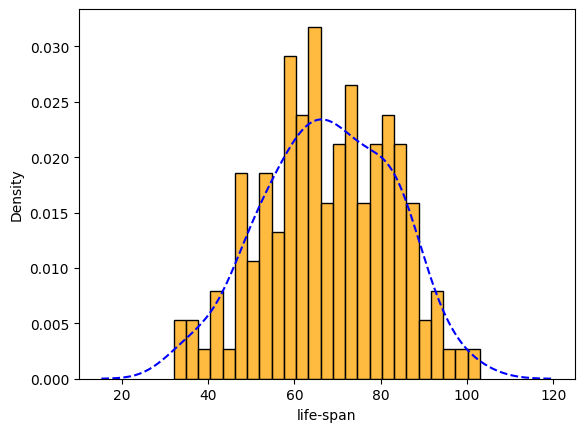

In [13]:
sns.histplot(
    df,
    x="life-span",
    color="orange",
    stat="density",
    bins=25,
)
sns.kdeplot(df, x="life-span", color="blue", linestyle="--")
plt.show()

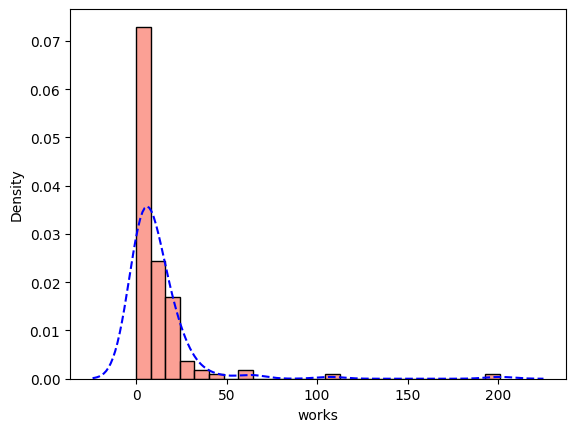

In [14]:
sns.histplot(
    df,
    x="works",
    color="salmon",
    stat="density",
    bins=25,
)
sns.kdeplot(df, x="works", color="blue", linestyle="--")
plt.show()

Let us apply Shapiro-Wilk to verify our intuition statistically:

In [15]:
print(f"Shapiro-Wilk on life-span: {sp.stats.shapiro(df['life-span'])}")
print(f"Shapiro-Wilk on works: {sp.stats.shapiro(df['works'])}")

Shapiro-Wilk on life-span: ShapiroResult(statistic=0.9909175496986184, pvalue=0.5425859608643291)
Shapiro-Wilk on works: ShapiroResult(statistic=0.44653065985042906, pvalue=2.807776354270452e-20)


In [16]:
sp.stats.shapiro(df["works"])

ShapiroResult(statistic=0.44653065985042906, pvalue=2.807776354270452e-20)

*Look at these $p$-values? Do these correspond to our initial hypothesis?* At this point, we should mention that there is something very **abnormal** about the procedures that we use to check for normality: typically, a test is set up in such a way that the null hypothesis ($H_0$) is the less interesting one, with the alternative hypothesis ($H_1$) as the more interesting, more daring hypothesis that a researcher might like to prove.

The $p$-value that we get from a procedure can be interpreted as the plausibility that the null-hypothesis is true: in the conventional setting, researchers are typically looking for a *low* $p$-value, since that would prove their alternative point. (When people are "$p$-hacking" or "$p$-fishing" they're often fishing for *low* $p$-values). In the case of Shapiro-Wilk, however, the null hypothesis is the hypothesis that the *data is indeed normally distributed*. Thus, the way you read the output of this test "reverses": often you'll need your data to be normally distributed, and thus you might be hoping to obtain a high $p$-value for the null hypothesis.

In the present case, that explains why we get a very high value for "life.span" (which is indeed normally distributed, since we can accept the null hypothesis), and a very low value for "works" (which is definitely not normally distributed, and we are on solid ground to reject $H_0$ with such a tiny $p$-value). In the end, no feelings like "hope" should be involved when interpreting the output of a test -- the data are what they are. Nevertheless, it's important to stress how these tests have to be read in a way that reverses how we would normally read a test's output.

> TAKEAWAY: Always read the assumptions and $H_0$ for your tests! The scipy documentation is excellent, and will almost always have a clear explanation, as well as application examples and links to the statistical literature (if you need it). The documentation for Shapiro-Wilk is [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html).

> EXERCISE
>
> Read the documentation, and answer this question. If we have a $p$-value from Shapiro-Wilk above the critical threshold, can we statistically conclude that the data is normally distributed?

### Kolmogorov-Smirnov

*Gries, chapter 4, pp. 172-178*

Shapiro-Wilk belongs to the family of so-called **goodness-of-fit tests**: it essentially tests how well your data "fit" a theoretical distribution, like the normal. One serious drawback of `sp.stats.shapiro()` is that the $p$-value is only guaranteed to be accurate for samples of up to **5,000 data points**. Luckily, there a number of alternatives that do not have that restriction. A very commonly used **goodness-of-fit test**, that you can also use to test for normality is the Kolgomorov-Smirnov procedure, implemented as `sp.stats.kstest()`. Calling the function is slightly more complex, as we'll have to explicitly specify which distribution we expect, as well as the main properties, by which we expect that distribution to be parametrized:

In [17]:
# define theoretical distribution to test against
lifenorm = sp.stats.norm(loc=df["life-span"].mean(), scale=df["life-span"].std())
# run the test
sp.stats.kstest(df["life-span"], lifenorm.cdf, alternative="two-sided")

KstestResult(statistic=0.05973575082543403, pvalue=0.7066655177919476, statistic_location=80, statistic_sign=-1)

This method `sp.stats.kstest` can perform either a *one-sample* or *two-sample* test. Here, we used a *one-sample* test, which tests a sample against a theoretical distribution (we will talk about *two-sample* tests later). If we want to be very clear in our code we could use the specific method `ks_1samp` to get the same result.

In [18]:
sp.stats.ks_1samp(df["life-span"], cdf=lifenorm.cdf, alternative="two-sided")

KstestResult(statistic=0.05973575082543403, pvalue=0.7066655177919476, statistic_location=80, statistic_sign=-1)

Now we test the `works` column

In [19]:
worksnorm = sp.stats.norm(loc=df["works"].mean(), scale=df["works"].std())
sp.stats.kstest(df["works"], lifenorm.cdf, alternative="two-sided")

KstestResult(statistic=0.9461286438710989, pvalue=3.72935956668284e-169, statistic_location=36, statistic_sign=1)

## Testing for variance

#### F-test for homogeneity of variances

Related to the question of whether two values have the same distribution, is the question whether two variables have the same **dispersion**. Two variables, for instance, even if they are both normally distributed, might have a similar mean, but a different standard deviation, so that the dispersion around in the mean in both samples is very different. In this section, we'll cover the **F-test for homogeneity of variances**. This procedure will test
- whether one group of values is more/less variable than another group of values (*one-tailed*)
- whether there's (just) a difference in variability between two groups of values (*two-tailed*)

This isn't a test we'll often use, but we discuss it, because the F-test is an excellent illustration of the complex dependency chains can exist between different statistical tests: before you could apply the famous t-test (discussed below), you have to make sure that two groups have similar variances, which you can assess using the F-test. The F-test itself, however, **assumes that the values in your two groups are normally distributed** (for which you'd need e.g. `shapiro()`).

As a case study, let us return to the queer speech example:

In [20]:
qs = pd.read_csv("../../datasets/queer/queer_speech.csv")
qs

,ID,sex,age,orientation,Testosterone,time,meanf0,f0sd,jitter,HNR,country_birth,mother_country,gp_father_maternal_country,gp_mother_maternal_country,father_country,gp_father_paternal_country,gp_mother_paternal_country,relationship,education,monthly_income
0,AA_110118_11,M,23,homosexual,178.866,41.41,103.50,13.48,2.63,9.53,france,france,france,france,france,france,france,no,Bac+4,1
1,AAV_06122017_4,M,21,heterosexual,108.809,44.09,108.76,13.24,2.01,10.21,france,france,france,france,france,france,france,yes,Bac+2,1
2,AAV_110118_10,M,24,heterosexual,100.154,32.81,91.42,13.99,2.38,9.33,france,france,france,france,france,france,france,yes,Bac+5,1
3,AAV_12122017_5,M,22,heterosexual,137.178,46.73,109.77,20.68,3.06,9.39,france,france,france,france,france,france,france,yes,Bac+3,1
4,AAV_131217_6,M,22,homosexual,98.721,39.57,117.36,13.68,1.66,12.62,france,france,france,france,france,france,france,no,Bac+3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,VAA_200118_3,M,30,heterosexual,121.875,32.26,99.31,14.19,3.60,8.04,france,france,france,france,france,europe,europe,yes,Bac+5,7
156,VAA_200118_5,M,31,heterosexual,112.249,40.77,123.59,27.43,2.57,10.95,france,france,france,france,france,france,france,yes,Bac+5,6
157,VAA_230118_1,M,24,heterosexual,136.869,39.02,109.06,24.16,2.62,10.36,france,france,france,france,france,france,france,yes,Bac+5,3
158,VAA_230118_2,M,25,heterosexual,116.582,34.56,85.70,19.40,3.29,8.78,france,france,france,france,france,france,france,yes,Bac+5,5


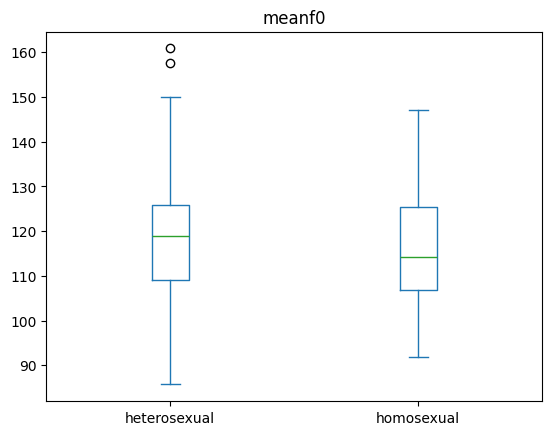

In [21]:
qs[qs.sex == "M"].plot.box(by="orientation", column=["meanf0"])
plt.show()

As you'll recall from a previous sprint, we already established that there's no significant difference in ranks between the "meanf0" in both groups. We might ask the more specific question is the same is true for the **variance** or **variability** in these measurements: maybe, even if the means might be similar for the two groups, maybe there's a difference in variance across the two sexual orientations? Could the measurements be more variable for one of the orientations? (Spoiler alert: this is probably not the case, since the actual **boxes** in our plot look very similar.)

As mentioned, we first need to test whether both variables are normally distributed:

In [22]:
qsm = qs[qs.sex == "M"].copy()
hom = qsm[qsm.orientation == "homosexual"].meanf0
het = qsm[qsm.orientation == "heterosexual"].meanf0

print(f"Shapiro-Wilk on meanf0 (heterosexual): {sp.stats.shapiro(het)}")
print(f"Shapiro-Wilk on meanf0 (homosexual): {sp.stats.shapiro(hom)}")

Shapiro-Wilk on meanf0 (heterosexual): ShapiroResult(statistic=0.9693077141159243, pvalue=0.23804679466937698)
Shapiro-Wilk on meanf0 (homosexual): ShapiroResult(statistic=0.9650642751371148, pvalue=0.0931943986643893)


That appears to be the case -- although the second $p$-value isn't very impressive, it's still higher than a critical threshold of 0.05. This means that we are allowed to apply the F-test. In Python, there isn't really a special API for this, since the F statistic is simply defined as a ratio of variances, so we will need to do it "by hand".

In [23]:
# recall that variance is the square of standard deviation
ratio = het.std() ** 2 / hom.std() ** 2
ratio

1.448393620610545

Now, what do we make of this ratio? Is it surprising? The F statistic, which we just calculated, is theoretically distributed according to the F distribution. Just like we had to use parameters for the normal distribution, we need parameters for the F distribution to get the theoretical shape matching our data. The parameters we need are called the "degrees of freedom" which is "insert maths here" but in summary it is the length of the sample minus 1

In [24]:
df_hom = hom.size - 1
df_het = het.size - 1

Now, just like we did with the normal, we create a distribution, check the output of the CDF, and calculate a $p$-value.

In [25]:
# To get a two-sided p-value we multiply by 2 (don't worry too much, but recap the 'hypothesis'
# notebook if this makes no sense at all)
(1 - sp.stats.f.cdf(ratio, df_het, df_hom)) * 2

0.18149690886397152

OK, the $p$-value is above a critical threshold of 0.05. Just to check our intuition, let's look at where our test statistic falls on the theoretical curve:

> REMINDER: This is the theoretical distribution for the F statistic. Since it is a **ratio** of variances it makes sense that the peak is at 1 (equal variances) and there are no values below zero

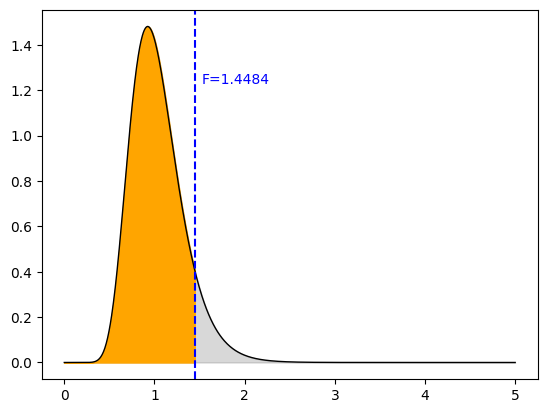

In [26]:
X = np.linspace(0, 5, 1000)
y = sp.stats.f.pdf(X, df_het, df_hom)  # PDF of F distribution with our params
ax = sns.lineplot(x=X, y=y, color="black", linewidth=1)
ax.fill_between(X, y, color="grey", alpha=0.3)
ax.fill_between(X, y, color="orange", where=(X < ratio))
ax.axvline(ratio, color="blue", linestyle="--")
# A new trick you might want one day...
trans = ax.get_xaxis_transform()  # lets us specify height by percentage
plt.text(ratio * 1.05, 0.8, f"F={ratio:.4f}", color="blue", transform=trans)
plt.show()

## Testing means

*Gries, chapter 4, pp. 205-238*

### $t$-test vs Wilcoxon test

A very common question in statistics is whether there is a "difference" in the values coming from two samples. Such a  "difference" can relate to many aspects regarding the samples (distribution, variance, ranks, etc.) but the most common formulation is probably the two samples differ in some kind of **measure of central tendency**, such as their mean. There exist a number of different scenarios to tackle such an issue and these relate to the following dimensions of the problem.

If the variables of which you'd like to compare the mean of are:
- normally distributed (Shapiro-Wilk)
- have homogeneous variance (F-test)
- *each* larger than 30 observations 

you would apply the **$t$-test**, which is one of the most widely used test in bivariate statistics. Otherwise, if one of these conditions is not met, you'd go for it's non-parametric alternative, the **Wilcoxon Rank Sum test** which is the test covered in the third sprint). Above, we've already seen that our two samples of "meanf0" are (both!) normally distributed, cover > 30 items, and have equal variances. That means that, in this specific case, we are in fact allowed to apply the "vanilla" $t$-test to test whether the means of the two samples are significantly different:

In [27]:
sp.stats.ttest_ind(hom, het, equal_var=True)

TtestResult(statistic=-0.7031215459757795, pvalue=0.48355104205379207, df=104.0)

The result is not unexpected given what we already know about this data: the probability ($p$-value) that the null hypothesis is so large that we have no choice but to accept it: there is no significant different in the means between them. In the function call above, you see that we explicitly state that we tested for any difference in variance between the two variances, but didn't find any (`equal_var=True` -- this is actually the default). If we set this to `False`, you'll see that, automatically, an alternative formulation of this test is carried out, namely **Welch's t-test**

In [28]:
sp.stats.ttest_ind(hom, het, equal_var=False)

TtestResult(statistic=-0.6909599200159974, pvalue=0.4913411320322585, df=91.43893191089234)

This variant is useful if your data doesn't have (a clear) homogeneity in variance. As you can see, the statistics which we obtain are pretty similar however and point in the same direction.

The $t$-test comes with clear assumptions that must be verified. This is not only cumbersome, but often these assumptions will just not hold. Just remember that the $t$-test is the parametric alternative to the Wilcoxon / Mann-Whitney U test (and that the latter is a much more "relaxed" test, so prefer the $t$-test if you can use it).

In [29]:
sp.stats.mannwhitneyu(hom, het)

MannwhitneyuResult(statistic=1288.5, pvalue=0.5132818705771971)

## Paired versus unpaired data

Both the $t$-test and the Wilcoxon come in two flavours: both have a variant for **paired** and **unpaired samples**, also known as **dependent** and **independent samples**. This is an important difference that we'll dwell on a little longer today. (In fact, we'll say a lot more about those in the very last session, on mixed effects regression.)

To illustrate the concept of paired data with an example from the Humanities, we'll work with a dataset coming from a famous domain of cultural production. The *Harry Potter* book series is a well-known cultural phenomenon across the entire world. The 7 books in the series were originally published in British English (by Bloomsbury), but later adapted into American English and marketed separately for an overseas audience in the US (by Scholastic). There exists a significant scholarship on the Harry Potter books and various people have studied aspects of the (cultural, but also stylistic) differences between the parallel UK and US editions of these 7 works. We will specifically be concerned with the hypothesis that the average sentence length is shorter in the US than in the UK versions of the books (presumably, because the writing style would have been simplified for an American audience).

In the file `potter/lengths.csv`, we provide the data that enables us to assess these hypotheses using statistical methods. Each row represents a single chapter of the 199 chapters in the 7 Harry Potter books. The columns hold the following metadata fields:
- `book`: the book from which the chapter was drawn;
- `chapter`: the title of the chapter (in the UK edition);
- `UK`: the average length of the sentences (measured in tokens) in the chapter in the UK edition;
- `US`: the average length of the sentences (measured in tokens) in the corresponding chapter in the US edition;
- `index`: the ranking of the chapter in the entire series (an integer ranging from 1-199).

We first load the data and verify that we have data for the 199 chapters in the series:

In [30]:
hp = pd.read_csv("../../datasets/potter/lengths.csv").dropna()
hp

,index,book,chapter,UK,US
0,1,1-Harry Potter and the Philosopher's Stone,00-The Boy Who Lived,20.989091,21.062044
1,2,1-Harry Potter and the Philosopher's Stone,01-The Vanishing Glass,21.505051,21.268657
2,3,1-Harry Potter and the Philosopher's Stone,02-The Letters from No One,19.738589,19.838174
3,4,1-Harry Potter and the Philosopher's Stone,03-The Keeper of the Keys,19.870968,19.846774
4,5,1-Harry Potter and the Philosopher's Stone,04-Diagon Alley,20.173302,19.911833
...,...,...,...,...,...
194,195,7-Harry Potter and the Deathly Hallows,32-The Prince’s Tale,21.755102,21.536437
195,196,7-Harry Potter and the Deathly Hallows,33-The Forest Again,20.284483,20.128205
196,197,7-Harry Potter and the Deathly Hallows,34-King’s Cross,19.057229,19.094225
197,198,7-Harry Potter and the Deathly Hallows,35-The Flaw in the Plan,27.484663,26.578635


We start with a very naive approach and plot the data at face value, i.e. we produce a run-off-the-mill distribution plot for the length measurements in both columns. They look pretty similar.

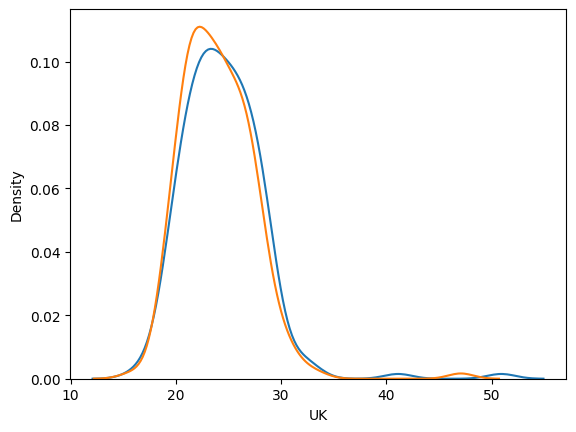

In [31]:
sns.kdeplot(hp, x="UK")
sns.kdeplot(hp, x="US")
plt.show()

On the QQ plot we can see the effect of the "long tail" to the right, and the "short tail" to the left (because sentence lengths can't be less than 0). It looks like this isn't normal, so we do a formal test to check.

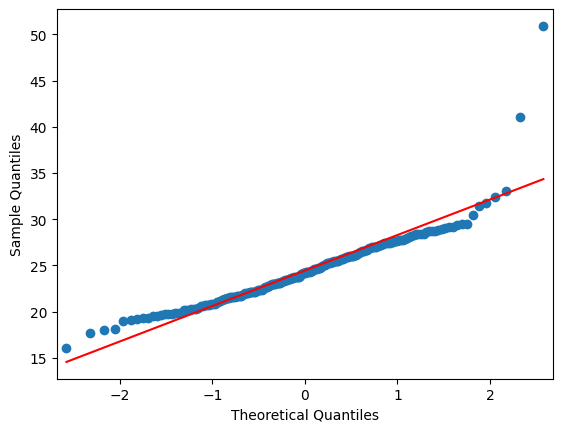

In [32]:
sm.qqplot(hp.UK, line="s")
plt.show()

In [33]:
sp.stats.shapiro(hp.UK)

ShapiroResult(statistic=0.8762433306121243, pvalue=1.0638520212936286e-11)

The evidence so far suggests, at first sight, that the difference in ranks isn't large, and because the IQRs overlap so strongly, one might not expect to find a statistically significant difference. The data violate the assumptions for normality (probably caused by the outliers) so we go for a non-parametric test (Wilcox), testing whether UK is greater than US (as alternative hypothesis). The unpaired version of the test judges the differences as non-significant (which was to be expected on the basis of the density plot).

In [34]:
sp.stats.mannwhitneyu(hp.US, hp.UK)

MannwhitneyuResult(statistic=18294.0, pvalue=0.18937514906147812)

What is going on here? Did we disprove the scholarly consensus? No, approaching the data in this manner is treacherous. Looking at this data from a simple, two-group perspective ignores the paired nature of this data. Indeed, when viewed as a group, the US chapter lengths aren't shorter overall than the UK chapter. However, we should account for the fact the US version is an *adaptation* of the UK version. In this data, we have two length columns that are paired: for each measurement in a UK chapter, we have a parallel measurement for the US chapter. These measurements run parallel to one another; they are not independent from one another. If you consider the example above again, where we compared "meanf0" from the two categories, that was an example of two independent groups of which we can compare the mean, without much additional thinking. All the values in sample 1 were completely independent from the values in sample 2, since all of these values were recorded for unique individuals. We were dealing with two fully **independent samples**.

Let's look at the data in a different way. Below we plot the **differences** in order (by simply subtracting the two columns), and suddenly the effect is clear! Most of the points have a positive difference (the UK text is longer)

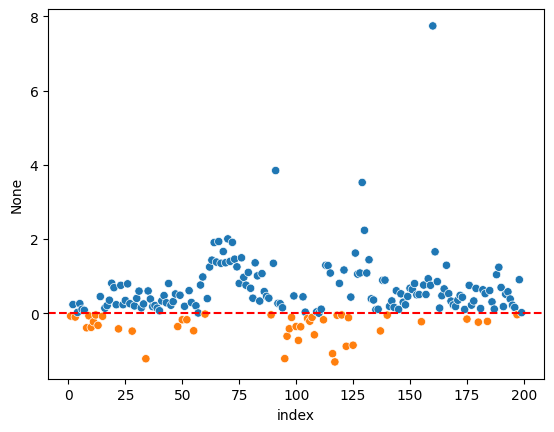

In [35]:
ax = sns.scatterplot(x="index", y=(hp.UK - hp.US), data=hp, hue=(hp.UK - hp.US < 0))
ax.axhline(0, color="red", linestyle="--")
ax.get_legend().remove()
plt.show()
sns.reset_defaults()

> EXERCISE: What type are these objects in the parentheses `(hp.UK - hp.US)`? If you don't already know, try using the built-in `__class__` property to find out...

For this situation we need the **other** Wilcoxon test (`sp.stats.wilcoxon()`). The "signed rank test" is designed for paired samples. This is used for situations where we have two paired samples with a "treatment" (where the 'individuals' are the same). This problem is a good example (same text, with the editing being the treatment), but it is most canonical for, eg, giving a medical treatment to individuals and seeing if it has an effect. For `sp.stats.wilcoxon()` you will need both samples to be identical in length.

In [36]:
sp.stats.wilcoxon(hp.UK, hp.US, alternative="greater")

WilcoxonResult(statistic=16804.0, pvalue=1.7883272479122673e-17)

This returns a very significant p-value: if we do take into account the paired nature of our data, we are suddenly able to confirm the prior hypothesis that the sentence length has been reduced in the adaptation process. This effect, however, only becomes statistically meaningful if we use the correct, paired variant of the test. The unpaired variant didn't identify any clear differences, because it didn't take into account that we should be doing the comparison on a chapter by chapter basis. 

By the way, there's also a paired variant of the parametric $t$-test (`sp.stats.ttest_rel()`). This test comes with the specific requirement, however, that the (row-wise) *differences* between both measurement samples is normally distributed (**not necessarily the samples themselves**). This is easy to check:

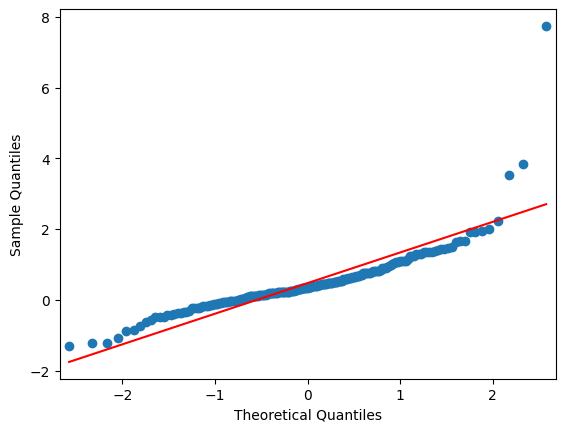

In [37]:
sm.qqplot(hp.UK - hp.US, line="s")
plt.show()

In [38]:
sp.stats.shapiro(hp.UK - hp.US)

ShapiroResult(statistic=0.7693535255876773, pvalue=2.1632373297686445e-16)

Clearly, the differences aren't normally distributed, so we are not allowed to apply the paired $t$-test in this context.

```
Version History

Current: v1.0.2

25/9/24: 1.0.0: first draft, BN
26/9/24: 1.0.1: typos, BN
04/10/24: 1.0.2: typos + proofreading, MK
```